**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Aula 10:** Monte Carlo

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/notebooks/aula10_monte_carlo.ipynb)

# Objetivo da Aula

Queremos criar um oráculo que nos ajude a otimizar as nossas tarefas. Em outras palavras, temos uma sequência de ações que gostaríamos de seguir e queremos otimizar o nosso resultado. Isso inclui tarefas como: sair o mais rápido possível de um labirinto, otimizar o percurso de um ponto $A$ ao ponto $B$, vencer em uma partida de Xadrez e assim por diante.

Em aulas anteriores, entendemos que computar o valor esperado do retorno futuro acumulado nos ajuda a criar um oráculo. Usamos como exemplo a ideia de um ratinho preso em uma caixa e querendo sair sem tomar tantos choques (nada letal).

Agora, vamos entender que a estratégia da semana passada pode ser proibitiva e, após isso, vamos usar uma nova estratégia que nos ajudará a resolver problemas reais. Essa nova estratégia é o que chamaremos de método de Monte Carlo.

# Resumo da Aula Anterior

Na aula anterior, estudamos uma abordagem baseada nos processos de **evaluation** e **improvement**. Nesta abordagem, estamos interessados em melhorar cada vez mais a nossa política até convergir para uma política ótima, ou que pelo menos seja boa o suficiente para o nosso problema.

Ao final da aula, notamos que o processo de **evaluation** não precisa completar, basta avançar um pouco com o **evalutation** e depois seguir com o **improvement**.

No **evaluation**, momento em que estamos interessados em computar os **state-values**, o nosso algoritmo da aula passada era baseado no preenchimento de uma matriz contendo uma estimativa de todos os **state-values** em uma dada iteração para, após isso, computar uma nova matriz com valores mais próximos dos reais. Esse processo era feito a cada iteração. Quando temos um problema recursivo e usamos uma estratégia iterativa com suporte de uma tabela (matriz), dizemos que o algoritmo utilizado usa a estratégia de Programação Dinâmica.

Esse método pode nos ajudar a resolver diversos problemas, mas algumas situações podem torná-lo proibitivo:

**Dificuldades da Programação Dinâmica:**

1. É preciso de uma representação em matriz (ou qualquer outra estrutura de dados com mais dimensões) para fazer a computação. Nesse caso, vamos armazenar em memória os valores de estado para cada um dos estados, o que pode ser problemático em problemas com muitos estados, dado que não temos recursos infinitos de memória.

2. É preciso conhecer *a priori* todos os estados que poderão algum dia ser visitados por um determinado agente e todas as ações permitidas nos estados. Entretanto, isso nem sempre é possível. Em determinados casos, o agente sequer conhece o ambiente, ou sequer tem a visão total do mesmo. Imagine um agente coletor de lixo com uma câmera acoplada, ele não consegue ver todo o ambiente, apenas a região ao redor registrada pela câmera.

**Voltando a Raciocinar sobre a Abordagem Frequentista de Probabilidade**

Temos que lembrar que o método da Programação Dinâmica usa o *bootstrapping* que surgiu a partir da nossa aplicação direta da fórmula para obter o valor esperado usando a construção clássica de probabilidade. Em outras palavras, o que fazemos é:

1. Criar as equações que regem as mudanças de estados e as recompensas;
2. Executar alguns poucos passos de *evaluation*;
3. Assumir que o que obtivemos na matriz corresponde a todos os valores de estados que procuramos.

Entretanto, podemos relembrar que os valores de estado também poderiam ser obtidos por meio da construção frequentista de probabilidade, da seguinte forma:

1. Colocar o agente em um estado qualquer; 2. Executar vários ensaios com esse agente seguindo a política e iniciando nesse mesmo estado;
3. Parar os ensaios após um número apropriado e assumir que a média dos ganhos é valor de estado que procuramos.

Obviamente que não obteremos solução da forma listada acima, porque o número de repetições seria proibitivo, lembrando que teríamos que executar começando em cada um dos estados. Entretanto, a abordagem de Monte Carlo sugere uma proposta mais inteligente.

A abordagem de Monte Carlo se parece com a construção frequentista no sentido de criar experimentos (o que chamaremos de episódios), mas computa os valores de estado de maneira mais eficiente. Precisaremos de alguma noção matemática antes de entender o que ela realmente faz.

# Abordagem de Monte Carlo

A abordagem de **Monte Carlo** permite criar diversos experimentos (episódios) e usar esses experimentos para estimar **state-values**. Essas estimativas nos ajudarão a criar novas políticas. A grande utilidade disso é que não precisaremos ter um conhecimento completo do ambiente, passaremos a conhecer o ambiente aos poucos, conforme novos estados são "descobertos" pelos episódios.

A pergunta é: Como seria a abordagem de Monte Carlo? A resposta consiste em uma sequência de passos:

1.   Inicialmente, devemos gerar um **episódio** seguindo uma dada **política**. No nosso caso, um episódio pode começar em qualquer estado inicial ao acaso no grid e terminar em um estado final. O caminho entre o estado de início e o estado final segue a política.

2. Uma sequência de passos possível pode ser: $s_1, s_2, s_3, \ldots, s_n$, onde $s_n$ é final. Uma ação pode ser vista como uma mudança de estado $(s_i, s_{i+1})$, e essa ação gerará uma recompensa $r_{i+1}$.
3.   Feito isso, devemos computar o retorno a longo prazo para aquele episódio. A computação será feita a partir do último estado em direção ao primeiro. Essa ordem de atualização nos ajudará a estimar o retorno futuro de cada estado na sequência $s_n, s_{n-1}, \ldots, s_2, s_1$.

Observe a figura a seguir para entender o motivo de a computação ser feita do último em direção ao primeiro. Isso permite computar todos os retornos acumulados de maneira eficiente.



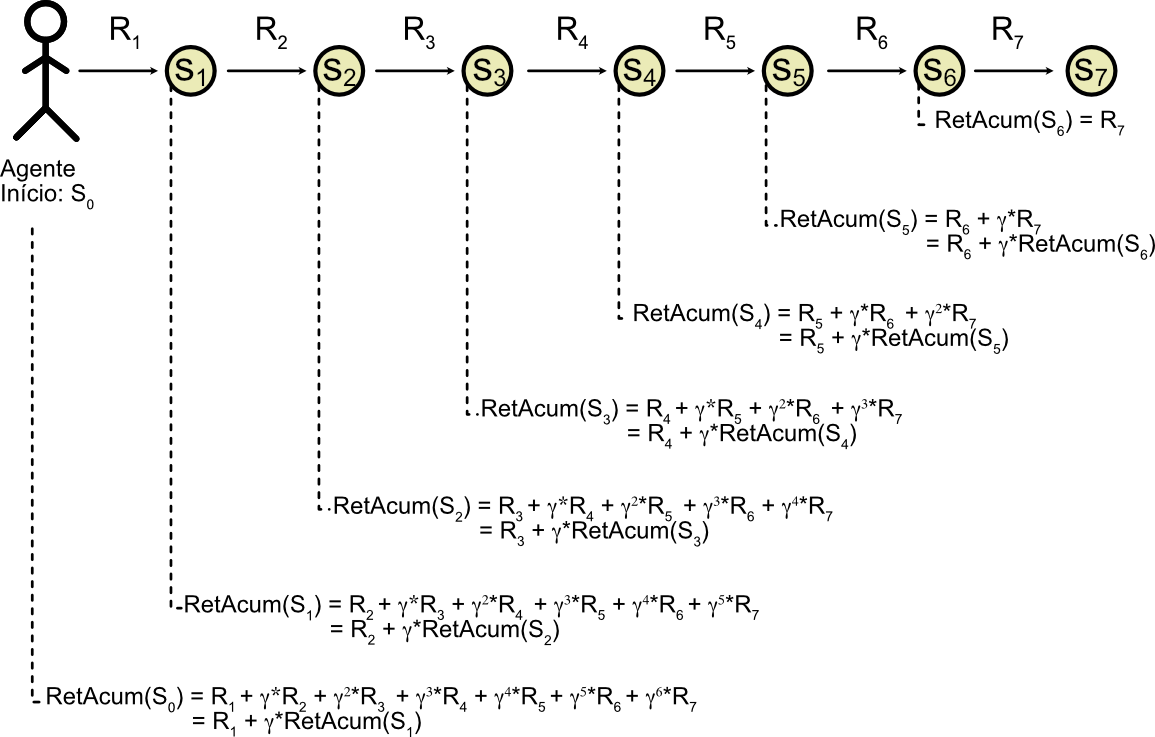

Vamos gerar várias simulações de episódios, sendo que o valor de cada estado deve ser uma média dos valores obtidos em cada amostra no Monte Carlo, após o referido episódio ter sido atingido.

Vamos supor que simulamos dois episódios e um estado qualquer foi visto cinco vezes. Sabemos qual foi o ganho acumulado de cada visita, pois isso pode ser computado facilmente assim que o episódio acaba e, para computar o valor de estado, precisaríamos em tese obter uma média desses valores acumulados.

Vamos supor que temos o problema do robô jardineiro e geramos os seguintes episódios com apenas 7 etapas:



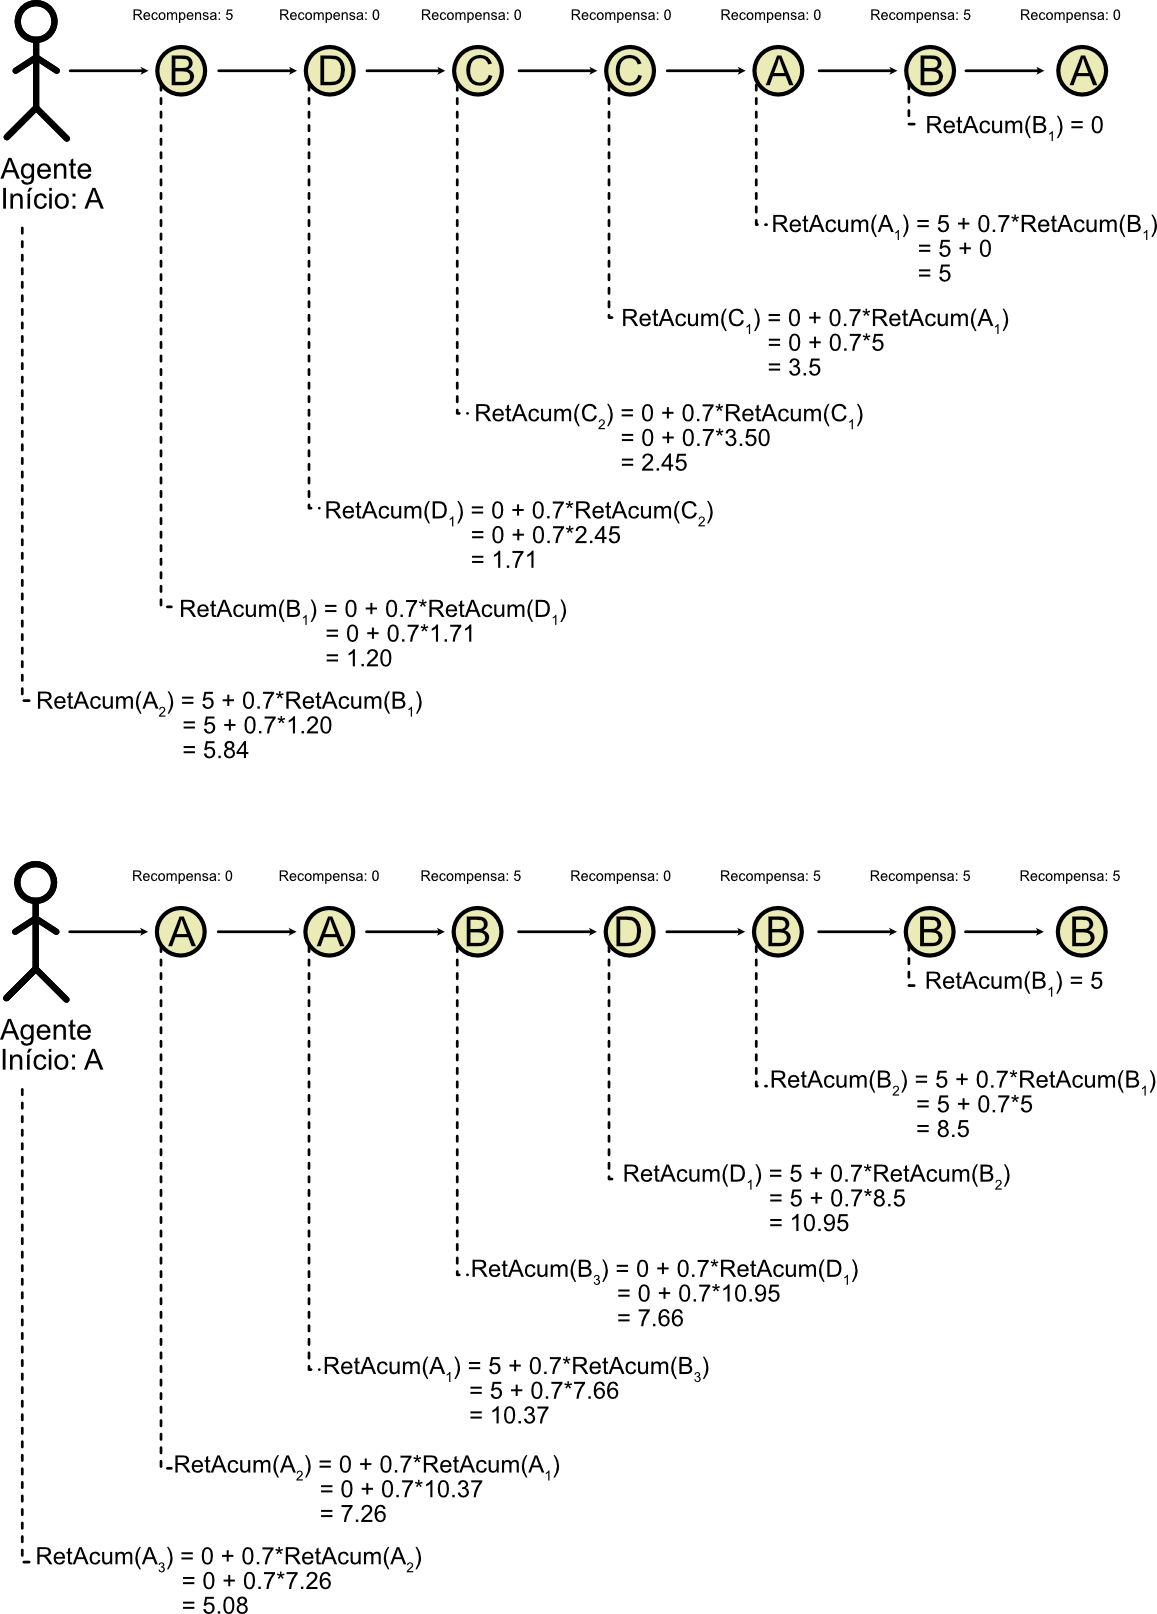

Lembre que a recompensa imediata de 5 só é dada quando o robô se move de um estado qualquer para o estado $B$. Com esses dois episódios, a média característica da construção frequentista deveria ser dada por:

1. Estado A

$\frac{Ret_{ep1}(A_1) + Ret_{ep1}(A_2) + Ret_{ep2}(A_1) + Ret_{ep2}(A_2) + Ret_{ep2}(A_3)}{5} = \frac{5 + 5.84 + 10.37+7.26+5.08}{5} = 6.71$

2. Estado B

$\frac{Ret_{ep1}(B_1) + Ret_{ep1}(B_2) + Ret_{ep2}(B_1) + Ret_{ep2}(B_2) + Ret_{ep2}(B_3)}{5} = \frac{0 + 1.20 + 5+8.5+7.66}{5} = 4.47$

3. Estado C

$\frac{Ret_{ep1}(C_1) + Ret_{ep1}(C_2) }{2} = \frac{3.5 + 2.45}{2} = 2.97$

4. Estado D

$\frac{Ret_{ep1}(D_1) + Ret_{ep2}(D_1) }{2} = \frac{1.71 + 10.95}{2} = 6.33$

Obviamente que os valores acima não significam muita coisa em relação ao valor esperado, dado que foram obtidos com um número muito reduzido de elementos. Entretanto, a ideia da construção frequentista é de que se fizermos muito mais experimentos do que apenas esses, a média irá convergir para o valor esperado da abordagem clássica.


Para computar a média, teríamos, em uma implementação ingênua, que ter todos os retornos acumulados de todos os estados vistados de todos os episódios armazenados  para computar a média. Entretanto, isso não é necessário.

Veja a formulação abaixo, em que queremos computar a média de $m$ valores, $AVG(s_m) = \frac{V_{\pi}(s_1) + V_{\pi}(s_2) + \ldots  + V_{\pi}(s_m)}{m}$, recebidos em sequência por termos alcançados os estados  $s_1, s_2, \ldots, s_m$ em um grupo de experimentos.

\begin{align}
AVG(s_m) & = \frac{\sum_{i=0}^{m}V_{\pi}(s_i)}{m} \\
         & = \frac{1}{m} \left[ V_\pi(s_m) + \sum_{i=0}^{m-1}V_{\pi}(s_i) \right]\\
        & = \frac{1}{m} \left[ V_\pi(s_m) + \frac{m-1}{m-1}\sum_{i=0}^{m-1}V_{\pi}(s_i) \right]\\
        & = \frac{1}{m} \left[ V_\pi(s_m) +(m-1) AVG(s_{m-1})\right]\\
         & = \frac{1}{m} \left[ V_\pi(s_m) + m AVG(s_{m-1}) - AVG(s_{m-1})\right]\\
         & = AVG(s_{m-1}) + \frac{1}{m} \left[V_\pi(s_m) - AVG(s_{m-1}) \right]
\end{align}

Na formulação acima, observamos que, para computar a média dos $m$ valores, precisamos apenas saber:

1. Quantos valores $m$ temos na sequência.
2. Qual a média dos valores que vieram antes de $m$, ou seja, a média dos $m-1$ valores anteriores.
3. Qual o valor do novo elemento na posição $m$.


Essa fórmula será muito importante de agora em diante. Para fixar, vamos ver o seu funcionamento em um código.

In [1]:
## ToDo: Crie abaixo um código para computar a média
## usando a fórmul vista acima.
def compute_media(media_anterior, m, novo_elemento) :
    pass

array = [1,3,2,4,6,7,8,15,15,9,10,11,2,3,51,3,5]
media_anterior = array[0]
for i in range(1, len(array)) :
    media = compute_media(media_anterior, i+1, array[i])
    media_anterior = media
    print("%.2f (fórmula) -- %.2f (método convencional)" % (media, sum(array[:i+1])/(i+1)))

2.00 (fórmula) -- 2.00 (método convencional)
2.00 (fórmula) -- 2.00 (método convencional)
2.50 (fórmula) -- 2.50 (método convencional)
3.20 (fórmula) -- 3.20 (método convencional)
3.83 (fórmula) -- 3.83 (método convencional)
4.43 (fórmula) -- 4.43 (método convencional)
5.75 (fórmula) -- 5.75 (método convencional)
6.78 (fórmula) -- 6.78 (método convencional)
7.00 (fórmula) -- 7.00 (método convencional)
7.27 (fórmula) -- 7.27 (método convencional)
7.58 (fórmula) -- 7.58 (método convencional)
7.15 (fórmula) -- 7.15 (método convencional)
6.86 (fórmula) -- 6.86 (método convencional)
9.80 (fórmula) -- 9.80 (método convencional)
9.38 (fórmula) -- 9.38 (método convencional)
9.12 (fórmula) -- 9.12 (método convencional)


Note que com o aumento do número de amostragens, os últimos valores passam a ter cada vez menos peso na computação da média final por conta do fator $\frac{1}{m}$. Esse efeito pode ser reduzido se, ao invés de usarmos $\frac{1}{m}$, substituirmos por algum $\alpha$ constante no intervalo de 0 a 1. Isso elimina a necessidade de armazenarmos o número de amostras que já foram obtidas de cada estado. Caso façamos muitos experimentos, o valor obtido por essa abordagem convergirá para o valor real.

Para ilustrar esse fato, observe a seguir o mesmo experimento feito anteriormente, mas substituindo o fator $\frac{1}{m}$ por um $\alpha = 0.1$. O que você deve observar é que a média obtida usando o método convencional é muito similar à média obtida com a fórmula, mesmo com a inserção do $\alpha$.


In [2]:
## ToDo: Crie um código para computar uma aproximação para
## a média usando o valor de alpha
def compute_media(media_anterior, novo_elemento, alpha=0.1) :
    pass

array = [1,3,2,4,6,7,8,15,15,9,10,11,2,3,51,3,5]
media_anterior = array[0]
for i in range(1, len(array)) :
    media = compute_media(media_anterior, array[i])
    media_anterior = media
    print("%.2f (fórmula) -- %.2f (método convencional)" % (media, sum(array[:i+1])/(i+1)))

1.20 (fórmula) -- 2.00 (método convencional)
1.28 (fórmula) -- 2.00 (método convencional)
1.55 (fórmula) -- 2.50 (método convencional)
2.00 (fórmula) -- 3.20 (método convencional)
2.50 (fórmula) -- 3.83 (método convencional)
3.05 (fórmula) -- 4.43 (método convencional)
4.24 (fórmula) -- 5.75 (método convencional)
5.32 (fórmula) -- 6.78 (método convencional)
5.69 (fórmula) -- 7.00 (método convencional)
6.12 (fórmula) -- 7.27 (método convencional)
6.61 (fórmula) -- 7.58 (método convencional)
6.15 (fórmula) -- 7.15 (método convencional)
5.83 (fórmula) -- 6.86 (método convencional)
10.35 (fórmula) -- 9.80 (método convencional)
9.61 (fórmula) -- 9.38 (método convencional)
9.15 (fórmula) -- 9.12 (método convencional)


Uma escolha mal apropriada de $\alpha$ pode fazer com que o resultado acabe não convergindo para os state-values. Entretanto, em muitos casos, isso não impedirá que o algoritmo convirja para uma política ótima. Como veremos a seguir, não é realmente necessário obter os state-values para progredir com as políticas, basta caminhar um pouquinho em direção a eles.

A seguir, veremos toda essa formulação em formato de código usando o ambiente GridWorld.

# GridWorld 4x4

In [3]:
## Efetuando o download do código da biblioteca
!wget https://www.ic.unicamp.br/~udias/si202/grid_world.py

## Importando a biblioteca
import grid_world as gw

--2023-11-21 18:22:26--  https://www.ic.unicamp.br/~udias/si202/grid_world.py
Resolving www.ic.unicamp.br (www.ic.unicamp.br)... 143.106.7.54, 2801:8a:40c0:cafe::54
Connecting to www.ic.unicamp.br (www.ic.unicamp.br)|143.106.7.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2692 (2.6K)
Saving to: ‘grid_world.py.2’

grid_world.py.2     100%[===================>]   2.63K  --.-KB/s    in 0s      

2023-11-21 18:22:27 (128 MB/s) - ‘grid_world.py.2’ saved [2692/2692]



In [4]:
###
# Abaixo, todos os movimentos a partir de um determinado estado. O estado é dado
# pelas coordenadas i,j de uma célula no gridworld.
# Este código já foi visto em aulas anteriores.
###
def move_up(state) :
  a, b = state
  a -= 1
  if a < 0 :
    a = 0
  return (a,b)

def move_right(state) :
  a, b = state
  b += 1
  if b > 3 :
    b = 3
  return (a,b)

def move_down(state) :
  a, b = state
  a += 1
  if a > 3 :
    a = 3
  return (a,b)

def move_left(state) :
  a, b = state
  b -= 1
  if b < 0 :
    b = 0
  return (a,b)


In [5]:
###
# Este é o bloco que define a política, conforme vimos em aulas anteriores
###
policy_cell = [0.25, 0.25, 0.25, 0.25] # Primeira política
policy     = [[policy_cell for i in range(4)] for j in range(4)]
policy[0][0] = [0.00, 0.00, 0.00, 0.00]
policy[3][3] = [0.00, 0.00, 0.00, 0.00]

In [6]:
###
# Este é o bloco que define a recompensa, conforme vimos em aulas anteriores
###

rewards = [
    [-1, -1, -1, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1]
]

In [7]:
###
# Este é o primeiro bloco de códigos que importa para a aula de hoje. Neste
# bloco de código, estamos gerando episódios seguindo uma dada política.
###

import random
def generate_episode(policy) :
    ## Vamos gerar um estado inicial ao acaso.
    initial_state = (
          random.randint(0,3),
          random.randint(0,3)
    )

    amostragem      = [initial_state]
    next_state_prob = policy[initial_state[0]][initial_state[1]]

    ## Enquanto não chegamos no estado final
    while sum(next_state_prob) > 0 :
        next_states  = [
                    move_up(amostragem[-1]),
                    move_right(amostragem[-1]),
                    move_down(amostragem[-1]),
                    move_left(amostragem[-1])
                  ]
        ## Note o uso do método random.choices, ele está obtendo um próximo estado
        ## se baseando na política adicionada em next_state_prob
        next_state = random.choices(next_states, next_state_prob)[0]
        amostragem.append(next_state)
        next_state_prob = policy[amostragem[-1][0]][amostragem[-1][1]]
    return amostragem

In [8]:
amostra = generate_episode(policy)
amostra

[(0, 2),
 (0, 2),
 (0, 1),
 (0, 2),
 (1, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 3),
 (2, 3),
 (2, 3),
 (2, 3),
 (2, 2),
 (2, 1),
 (1, 1),
 (2, 1),
 (2, 0),
 (2, 0),
 (2, 0),
 (3, 0),
 (3, 0),
 (2, 0),
 (2, 0),
 (2, 0),
 (1, 0),
 (2, 0),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 2),
 (0, 2),
 (0, 3),
 (0, 3),
 (0, 3),
 (1, 3),
 (0, 3),
 (1, 3),
 (0, 3),
 (0, 3),
 (0, 2),
 (1, 2),
 (1, 3),
 (1, 2),
 (1, 1),
 (1, 0),
 (0, 0)]

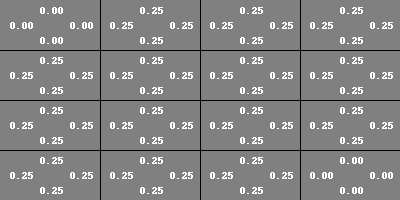

In [9]:
display(gw.draw_policy(policy))


In [10]:
###
# Na função a seguir, atualizamos os state-values de acordo com uma "amostra",
# ao invés de utilizar a matriz completa de estados. Observe que sequer precisamos
# conhecer todos os estados, basta conhecer os estados visitados naquele episódio.
###

def update_state_values_monte_carlo(state_values, rewards, amostra, gamma, alpha = 0.1) :
    ## Definiremos o último state_value como zero para iniciar o processo iterativo.
    discounted_return = 0
    next_state        = amostra[-1]

    ## Observe o uso de "reversed" estamos iterando de trás pra frente.
    for state in reversed(amostra[:-1]) :
        i,j = state
        ## Abaixo simplesmente computamos o state_value da amostra fornecida.
        discounted_return = gamma*discounted_return + rewards[next_state[0]][next_state[1]]

        ## Abaixo a fórmula para atualização dos state-values. Isso substitui o valor esperado (média).
        state_values[i][j] = state_values[i][j] + alpha*(discounted_return - state_values[i][j])
        next_state = i,j

    return state_values




###
# Apenas para fazer uma comparação, a seguir implementamos uma versão em que
# não faremos a aproximação da média usando o alpha. Isso forçará
###

def update_state_values_monte_carlo_no_approx(state_values, rewards, amostra, gamma, num_visits = {}) :


    ## Definiremos o último state_value como zero para iniciar o processo iterativo.
    discounted_return = 0
    next_state        = amostra[-1]

    ## Observe o uso de "reversed" estamos iterando de trás pra frente.
    for state in reversed(amostra[:-1]) :
        i,j = state

        n = num_visits.get( (i,j), 0) + 1
        num_visits[(i,j)] = n

        ## Abaixo simplesmente computamos o state_value da amostra fornecida.
        discounted_return = gamma*discounted_return + rewards[next_state[0]][next_state[1]]

        ## Abaixo a fórmula para atualização dos state-values. Isso substitui o valor esperado (média).
        state_values[i][j] = state_values[i][j] + (1/n)*(discounted_return - state_values[i][j])
        next_state = i,j

    return state_values


In [11]:
state_values = [
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0]
]

images = [gw.draw_state_values(state_values)]
gamma  = 0.7
num_visits = {}
for i in range(1000) :
    amostra = generate_episode(policy)
    state_values = update_state_values_monte_carlo_no_approx(state_values, rewards, amostra, gamma, num_visits)
    images.append(gw.draw_state_values(state_values))
gw.display_sequence(images)

interactive(children=(IntSlider(value=500, description='frame', max=1000), Output()), _dom_classes=('widget-in…

<function grid_world.display_sequence.<locals>._show(frame=(0, 1000))>

In [12]:
state_values = [
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0]
]

images = [gw.draw_state_values(state_values)]
gamma  = 0.7
alpha  = 0.1
for i in range(100) :
    amostra = generate_episode(policy)
    state_values = update_state_values_monte_carlo(state_values, rewards, amostra, gamma, alpha)
    images.append(gw.draw_state_values(state_values))
gw.display_sequence(images)

interactive(children=(IntSlider(value=50, description='frame'), Output()), _dom_classes=('widget-interact',))

<function grid_world.display_sequence.<locals>._show(frame=(0, 100))>

Quais são as vantagens de Monte Carlo até agora?

1.   Monte Carlo aprende diretamente das experiências, eliminando a necessidade de conhecer completamente o ambiente onde o agente está inserido.
2.   A estimativa de valor de um estado em particular independe dos valores de todos os outros estados ao seu redor.
3.   O tempo computacional não depende do tamanho do problema, mas do tamanho do episódio.

Como Monte Carlo pode ser usado para resolver o processo de **evaluation**, podemos melhorar a política com os state-values da maneira como temos feito anteriormente. Várias abordagens são possívels. Por exemplo, podemos executar Monte Carlo com um número fixo de episódios e depois atualizar a política. Note que o comportamento do método **find_greedy_policy** para encontrar a próxima política é  semelhante ao que estudamos na aula anterior, dado que precisamos apenas dos **state-values**, e não da forma como esses **state-values** são computados..

In [13]:
###
# Abaixo o código que encontra uma política a partir dos state_values. Esse
# código não difere do que vimos na aula passada.
###
def find_greedy_policy(state_values, rewards, gamma) :
  policy_array  = [[ [0,0,0,0] for i in range(4)] for j in range(4)]

  for i in range(4) :
    for j in range(4) :

      ## Inicialmente, vamos descartar os estados finais.
      if (i == j == 0) :
          continue
      if (i == j == 3) :
          continue

      state = (i,j)

      up = move_up(state)
      rg = move_right(state)
      dw = move_down(state)
      lf = move_left(state)

      best_state = max( (
          rewards[up[0]][up[1]] + gamma*state_values[up[0]][up[1]],
          rewards[rg[0]][rg[1]] + gamma*state_values[rg[0]][rg[1]],
          rewards[dw[0]][dw[1]] + gamma*state_values[dw[0]][dw[1]],
          rewards[lf[0]][lf[1]] + gamma*state_values[lf[0]][lf[1]]
        )
      )

      ## Creating array to make algorithm easier
      neighbors = [ up, rg, dw, lf ]

      ## Computando o número de empates para criar uma política estocástica
      ties = 0
      for neighbor in neighbors :
        if rewards[neighbor[0]][neighbor[1]] + gamma*state_values[neighbor[0]][neighbor[1]] == best_state :
          ties += 1
      prob = 1.0/ties

      ## Verificando quem possui valor igual ao melhor
      for k in range(4) :
        neighbor  = neighbors[k]
        if rewards[neighbor[0]][neighbor[1]] + gamma*state_values[neighbor[0]][neighbor[1]] == best_state :
          policy_array[i][j][k] = 1.0/ties
  return policy_array



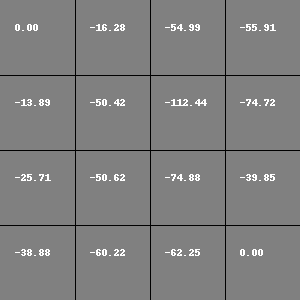

------------------------


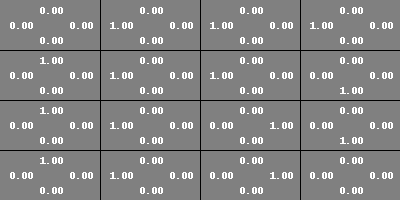

------------------------


In [14]:
###
# Uma primeira abordagem. Executar evaluation várias vezes e depois improvement.
# Feito isso, será preciso executar evaluation várias vezes de novo e depois
# improvement.
###
state_values = [
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0]
]
rewards = [
    [-1, -1, -1, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1]
]

## Inicializando a política
policy_cell = [0.25, 0.25, 0.25, 0.25] # Primeira política
policy     = [[policy_cell for i in range(4)] for j in range(4)]
policy[0][0] = [0.00, 0.00, 0.00, 0.00]
policy[3][3] = [0.00, 0.00, 0.00, 0.00]

gamma  = 0.7
alpha  = 0.1
for i in range(100) :
    amostra = generate_episode(policy)
    state_values = update_state_values_monte_carlo(state_values, rewards, amostra, gamma, alpha)

policy1 = find_greedy_policy(state_values, rewards, gamma)

display(gw.draw_state_values(state_values))
print("------------------------")
display(gw.draw_policy(policy1))
print("------------------------")

In [15]:
## Note pela nova política que o canto superior esquerdo
## é uma célula que nos impedirá de criar um episódio.
## Isso ocorre porque ao chegar nesta célula, o agente
## fica preso indo para cima e indo para a esquerda.
## Nesse caso, se você executar muitas vezes a linha a
## seguir, então eventualmente chegará em um looping infito.
amostra = generate_episode(policy1)

## Essa característica mostra que devemos fornecer um epsilon
## para todas as ações possíveis.


Uma segunda abordagem que podemos tentar com Monte Carlo é  atualizar a política a cada iteração. Nesse caso, o tempo computacional tende a ser menor. À medida em que a política evolui para a política ótima, os episódios tendem a ser muito mais curtos. Entretanto, um cuidado precisa ser tomado, porque a política pode acabar convergindo muito rapidamente para uma situação não ótima, evitando ações que poderiam ainda ser exploradas.

Para evitar que isso aconteça, podemos dar uma probabilidade, nem que seja bem baixa de a política explorar qualquer ação ao acaso. Em outras palavras, podemos assumir que todas as ações terão no mínimo uma probabilidade $\epsilon$ de ocorrer. Isso garante que nunca deixaremos de explorar.

Abaixo, criamos um método chamado *generate_epsilon_greedy_episode* que executa uma ação ao acaso com probabilidade *epsilon*.

In [16]:
def generate_epsilon_greedy_episode(policy, epsilon) :
    ## Vamos gerar um estado inicial ao acaso.
    initial_state = (
          random.randint(0,3),
          random.randint(0,3)
    )

    amostragem      = [initial_state]
    next_state_prob = policy[initial_state[0]][initial_state[1]]

    ## Enquanto não chegamos no estado final
    while sum(next_state_prob) > 0 :
        next_states  = [
                    move_up(amostragem[-1]),
                    move_right(amostragem[-1]),
                    move_down(amostragem[-1]),
                    move_left(amostragem[-1])
                  ]
        ## A mudança ocorre aqui.
        epsilon_random = random.random()
        next_state = None
        if epsilon_random < epsilon :
            next_state = random.choices(next_states)[0]
        else :
            next_state = random.choices(next_states, next_state_prob)[0]

        amostragem.append(next_state)
        next_state_prob = policy[amostragem[-1][0]][amostragem[-1][1]]
    return amostragem


In [17]:
###
# Uma segunda abordagem, vamos realizar o improvement após cada evaluation.
###
state_values = [
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0]
]
rewards = [
    [-1, -1, -1, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1]
]

## Inicializando a política
policy_cell = [0.25, 0.25, 0.25, 0.25] # Primeira política
policy     = [[policy_cell for i in range(4)] for j in range(4)]
policy[0][0] = [0.00, 0.00, 0.00, 0.00]
policy[3][3] = [0.00, 0.00, 0.00, 0.00]

gamma  = 0.7
alpha  = 0.3

images_sv = [gw.draw_state_values(state_values)]
images_pi = [gw.draw_policy(policy)]

for i in range(100) :
    amostra = generate_epsilon_greedy_episode(policy, 0.01)
    state_values = update_state_values_monte_carlo(state_values, rewards, amostra, gamma, alpha)
    policy = find_greedy_policy(state_values, rewards, gamma)

    ## Gerando as imagens
    images_sv.append(gw.draw_state_values(state_values))
    images_pi.append(gw.draw_policy(policy))

gw.display_sequence(images_sv)
print("----------")
gw.display_sequence(images_pi)

interactive(children=(IntSlider(value=50, description='frame'), Output()), _dom_classes=('widget-interact',))

----------


interactive(children=(IntSlider(value=50, description='frame'), Output()), _dom_classes=('widget-interact',))

<function grid_world.display_sequence.<locals>._show(frame=(0, 100))>